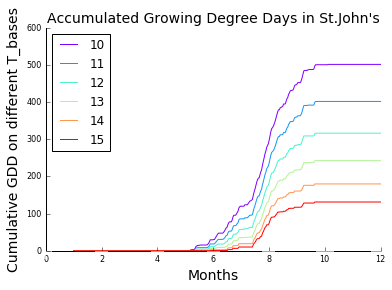

In [51]:
%matplotlib inline
import wget
import numpy as np
import pandas as pd
import time as time
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 

T_baseList=[10,11,12,13,14,15]

def checkGDD(values):
    gdd = []
    item = 0
    for i in values:
        if i >= 0:
            item += i
        gdd.append(item)
    return gdd

def gdd_Tbase(i):
    start=2015
    end=2015
    stationid=50089
    cityName1 = 'St. John\'s'
    url = 'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID='+str(stationid)+'&Year='+str(start)+'&Month='+str(smonth)+'&Day=31&timeframe=2&submit= Download+Data'
    filename=wget.download(url)
    hourly_data=pd.read_csv(filename,encoding='ISO-8859-1',delimiter=",", skiprows=25)
    df = pd.DataFrame(hourly_data, columns = ['Date/Time', 'Max Temp (°C)', 'Min Temp (°C)'])
    df['GDD'+str(i)]=(df['Max Temp (°C)']+df['Min Temp (°C)'])/2-T_baseList[i]
    df['GDD'+str(i)]=checkGDD(df['GDD'+str(i)])
    gddt=df['GDD'+str(i)]
    gddt=np.array(gddt)
    return gddt

color=iter(cm.rainbow(np.linspace(0,1,len(T_baseList))))
plt.subplot(1,1,1)
X = np.linspace(1, 12, 365, endpoint=True)
for i in range(len(T_baseList)):
    c=next(color)
    plt.plot(X, gdd_Tbase(i),c=c,label =str(T_baseList[i]))
plt.legend(loc='upper left')
ax = plt.gca() 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

ax.set_xlabel('Months', color='black', fontsize=14)
ax.set_ylabel('Cumulative GDD on different T_bases', color='black', fontsize=14)
plt.title("Accumulated Growing Degree Days in St.John's", color="black", fontsize=14)

plt.show()
